<a href="https://colab.research.google.com/github/ramun9533/Proyecto_Final_curso_pythpn/blob/main/Proyecto_Final_(%5E_%5E).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
# Se importa libreria para dibujar
import matplotlib.pyplot as plt
# Se iportan librerias para hacer peticiones a las paginas we y obtener su codigo
# , asi como tambien para tratar los datos web obtenidos
from bs4 import BeautifulSoup
import requests
#
# Se crea lista de paginas web.
urls = [
    'https://www.mercadolibre.com.mx/realme-11-pro-plus-12gb-ram-512gb-rom-200mp-ois-dual-sim-verde-5000-mah-100w-pantalla-curva-120hz-fhd/p/MLM23438802?pdp_filters=item_id:MLM1922556715#is_advertising=true&searchVariation=MLM23438802&position=1&search_layout=stack&type=pad&tracking_id=97805d59-1549-48d8-a60a-8b8beea8d935&is_advertising=true&ad_domain=VQCATCORE_LST&ad_position=1&ad_click_id=ZjZjY2ZlZWEtY2YwNi00YWI0LWJkZWItMDE3OWQwNWIyOTY3',
    'https://articulo.mercadolibre.com.mx/MLM-2286029578-celular-8849-tank-2-de-12gb-256gb-155000mah-con-proyector-_JM#polycard_client=bookmarks',
    'https://www.mercadolibre.com.mx/realme-gt-2-pro-dual-sim-256-gb-steel-black-12-gb-ram/p/MLM19130693?pdp_filters=item_id:MLM1507221033#is_advertising=true&searchVariation=MLM19130693&position=9&search_layout=stack&type=pad&tracking_id=d7676704-bae0-4c80-8d25-29fa31f1b171&is_advertising=true&ad_domain=VQCATCORE_LST&ad_position=9&ad_click_id=MjMzNjkyN2QtZmI2MC00ZDAzLWJiZDUtZGQ1OWI5NWU0MWFl'
]



[10831, 7558, 9324]


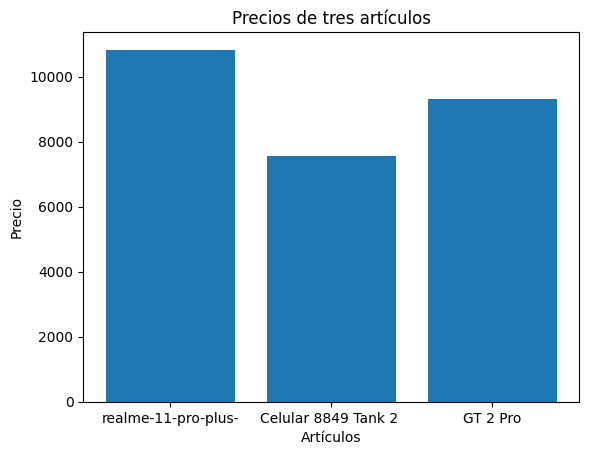

In [180]:
def mameluco(url):
  # Manda consultar la pagina "url" y guarda en "page" el contenido
  page = requests.get(url)
  # Secciona "page"
  sopita = BeautifulSoup(page.content, 'html.parser')
  #print(len(sopita))
  # Se crea una lista de todos los elementos (con find_all) que contienen las
  # etiquetas "span" y los atributos (attr)"class":"andes-money-amount__fraction"
  # con un limite de lista de 2 (limit=2)
  chango_tag = sopita.find_all('span', attrs={"class":"andes-money-amount__fraction"}, limit=2)
  # De esa lista se extrae la posicion 2 de la variable chango_tag1 (chango_tag[1])
  chango_tag1 = str(chango_tag[1])
  # Se vuelve a parir
  sopita1 = BeautifulSoup(chango_tag1, 'html.parser')
  # Con find() se obtiene lo que esta dentro de las etiquetas  span
  chango_tag2 = sopita1.find('span', attrs={"class":"andes-money-amount__fraction"})
  # Se le retira las comas
  price_str = chango_tag2.text.replace(',', '')
  # Se covierte a entero la variable price_str
  return int(price_str)
# Se crea la lista "precios" usando la funcion "mameluco" y un "for" que va
# recorriendo todas las paginas web guardadas en la variable "urls" y mandando
# una por una a la variable "url"
precios = [mameluco(url) for url in urls]
#print(precios)
# Se crea la lsita de aritculos
articulos = ['realme-11-pro-plus-', 'Celular 8849 Tank 2 ', 'GT 2 Pro']

# Se crea la funcion que gebera una gráfica de barras
def imprime(precios, articulos):
    # Crear la gráfica de barras
    plt.bar(articulos, precios)

    # Etiquetas del eje x
    plt.xlabel('Artículos')

    # Etiquetas del eje y
    plt.ylabel('Precio')

    # Título del gráfico
    plt.title('Precios de tres artículos')

    # Mostrar el gráfico
    plt.show()

# Se manda a llamar la funcion "imprime" mandandole dos parametros:
# precios y articulos
imprime(precios, articulos)